# Pixel coordicat transfer to GPS coordinate!

###  Function1. Ask the user to input 2 point with GPS and Pixel information

In [5]:
import numpy as np
import pandas as pd

def image_to_gps(image_coord, image_corners_gps, image_size=(640, 640)):
    bottom_left, bottom_right, top_left, top_right = image_corners_gps
    image_diag_length = np.sqrt(image_size[0]**2 + image_size[1]**2)
    gps_ratio_x = (top_right[0] - top_left[0]) / image_size[0]
    gps_ratio_y = (top_left[1] - bottom_left[1]) / image_size[1]
    gps_x = bottom_left[0] + image_coord[0] * gps_ratio_x
    gps_y = bottom_left[1] + image_coord[1] * gps_ratio_y
    return gps_x, gps_y

def calculate_corner_gps(p1_pixel, p1_gps, p2_pixel, p2_gps):
    pixel_distance = np.sqrt((p2_pixel[0] - p1_pixel[0])**2 + (p2_pixel[1] - p1_pixel[1])**2)
    gps_distance = np.sqrt((p2_gps[0] - p1_gps[0])**2 + (p2_gps[1] - p1_gps[1])**2)
    pixel_to_gps_ratio = gps_distance / pixel_distance

    bottom_left_gps = p1_gps
    bottom_right_gps = (p1_gps[0] + (p2_gps[0] - p1_gps[0]), p1_gps[1])
    top_left_gps = (p1_gps[0], p1_gps[1] + (p2_gps[1] - p1_gps[1]))
    top_right_gps = (bottom_right_gps[0], top_left_gps[1])

    return [bottom_left_gps, bottom_right_gps, top_left_gps, top_right_gps]

def convert_image_coordinates_to_gps(input_file, output_file, image_corners_gps):
    # Read input CSV file
    df = pd.read_csv(input_file)

    gps_coords = []

    # Iterate through image coordinates
    for index, row in df.iterrows():
        image_coord = (row['x'], row['y'])
        gps_coord = image_to_gps(image_coord, image_corners_gps)
        gps_coords.append(gps_coord)
        print(f"Image coordinate ({image_coord[0]}, {image_coord[1]}) converted to GPS coordinate ({gps_coord[0]}, {gps_coord[1]})")

    # Create DataFrame for GPS coordinates
    df_gps = pd.DataFrame(gps_coords, columns=['GPSX', 'GPSY'])

    # Write GPS coordinates to output CSV file
    df_gps.to_csv(output_file, index=False)

if __name__ == "__main__":
    # User inputs pixel and GPS coordinates of two points
    p1_pixel = tuple(map(float, input("Enter pixel coordinates of point 1 (comma-separated): ").split(',')))
    p1_gps = tuple(map(float, input("Enter GPS coordinates (WGS-84) of point 1 (comma-separated): ").split(',')))
    p2_pixel = tuple(map(float, input("Enter pixel coordinates of point 2 (comma-separated): ").split(',')))
    p2_gps = tuple(map(float, input("Enter GPS coordinates (WGS-84) of point 2 (comma-separated): ").split(',')))
    # example use:
    # point1 pixel coordinate: 100,200
    # point1 GPS coordinate: 40.7060,-74.0060
    # point2 pixel coordinate: 400,300
    # point2 GPS coordinate: 40.7128,-73.9970
    # Calculate GPS coordinates of image corners
    image_corners_gps = calculate_corner_gps(p1_pixel, p1_gps, p2_pixel, p2_gps)

    # Input and output file paths
    input_file = "bestpath.csv"
    output_file = "bestpath_GPS.csv"

    # Call the function to perform conversion
    convert_image_coordinates_to_gps(input_file, output_file, image_corners_gps)

    print("Conversion completed. GPS coordinates saved to", output_file)


Image coordinate (377.1540180066697, 505.1475248911469) converted to GPS coordinate (40.710007261441326, -73.99889636293122)
Image coordinate (378.6868126457197, 509.9067832991869) converted to GPS coordinate (40.71002354738436, -73.99882943585986)
Image coordinate (380.2196072847698, 514.6660417072269) converted to GPS coordinate (40.7100398333274, -73.99876250878849)
Image coordinate (380.9007630515667, 516.7809997242528) converted to GPS coordinate (40.71004707060742, -73.99873276719138)
Image coordinate (381.2543642400468, 517.7159506020535) converted to GPS coordinate (40.71005082762005, -73.99871961944466)
Image coordinate (381.6995382359595, 518.6109294050192) converted to GPS coordinate (40.71005555759376, -73.99870703380525)
Image coordinate (382.2318370078927, 519.4569938007913) converted to GPS coordinate (40.71006121326821, -73.99869513602468)
Image coordinate (382.84594200247176, 520.245690193599) converted to GPS coordinate (40.71006773813378, -73.99868404498166)
Image co

###  Function2. Ask the user to enter GPS information for the 4 corners of the image

In [40]:
import numpy as np
import pandas as pd

def image_to_gps(image_coord, image_corners_gps, image_size=(640, 640)):
    bottom_left, bottom_right, top_left, top_right = image_corners_gps
    image_diag_length = np.sqrt(image_size[0]**2 + image_size[1]**2)
    gps_ratio_x = (top_right[0] - top_left[0]) / image_size[0]
    gps_ratio_y = (top_left[1] - bottom_left[1]) / image_size[1]
    gps_x = bottom_left[0] + image_coord[0] * gps_ratio_x
    gps_y = bottom_left[1] + image_coord[1] * gps_ratio_y
    return gps_x, gps_y

def convert_image_coordinates_to_gps(input_file, output_file, image_corners_gps):
    # Read input CSV file
    df = pd.read_csv(input_file)

    gps_coords = []

    # Iterate through image coordinates
    for index, row in df.iterrows():
        image_coord = (row['x'], row['y'])
        gps_coord = image_to_gps(image_coord, image_corners_gps)
        gps_coords.append(gps_coord)
        print(f"Image pixel coordinate ({image_coord[0]}, {image_coord[1]}) converted to GPS coordinate ({gps_coord[0]}, {gps_coord[1]})")

    # Create DataFrame for GPS coordinates
    df_gps = pd.DataFrame(gps_coords, columns=['GPSX', 'GPSY'])

    # Write GPS coordinates to output CSV file
    df_gps.to_csv(output_file, index=False)

if __name__ == "__main__":
    # User inputs GPS coordinates of the four corners of the image
    bottom_left_gps = tuple(map(float, input("Enter GPS coordinates of bottom left corner (comma-separated): ").split(',')))
    bottom_right_gps = tuple(map(float, input("Enter GPS coordinates of bottom right corner (comma-separated): ").split(',')))
    top_left_gps = tuple(map(float, input("Enter GPS coordinates of top left corner (comma-separated): ").split(',')))
    top_right_gps = tuple(map(float, input("Enter GPS coordinates of top right corner (comma-separated): ").split(',')))
    # Example input GPS with degree
    # bottom left corner：40.7060, -74.0060
    # bottom right corner：40.7128, -74.0060
    # top left corner：40.7060, -73.9970
    # top right corner：40.7128, -73.9970
    
    # Combine into a list of GPS coordinates of the four corners
    image_corners_gps = [bottom_left_gps, bottom_right_gps, top_left_gps, top_right_gps]

    # Input and output file paths
    input_file = "bestpath.csv"
    output_file = "bestpath_GPS.csv"

    # Call the function to perform conversion
    convert_image_coordinates_to_gps(input_file, output_file, image_corners_gps)

    print("Conversion completed. GPS coordinates saved to", output_file)






Image pixel coordinate (377.1540180066697, 505.1475248911469) converted to GPS coordinate (40.710007261441326, -73.99889636293122)
Image pixel coordinate (378.6868126457197, 509.9067832991869) converted to GPS coordinate (40.71002354738436, -73.99882943585986)
Image pixel coordinate (380.2196072847698, 514.6660417072269) converted to GPS coordinate (40.7100398333274, -73.99876250878849)
Image pixel coordinate (380.9007630515667, 516.7809997242528) converted to GPS coordinate (40.71004707060742, -73.99873276719138)
Image pixel coordinate (381.2543642400468, 517.7159506020535) converted to GPS coordinate (40.71005082762005, -73.99871961944466)
Image pixel coordinate (381.6995382359595, 518.6109294050192) converted to GPS coordinate (40.71005555759376, -73.99870703380525)
Image pixel coordinate (382.2318370078927, 519.4569938007913) converted to GPS coordinate (40.71006121326821, -73.99869513602468)
Image pixel coordinate (382.84594200247176, 520.245690193599) converted to GPS coordinate 

### Function3: Based on 2 point GPS (WGS-84) to calculate distance in meters

In [2]:
from math import radians, sin, cos, sqrt, atan2

def gps_to_meters(lat1, lon1, lat2, lon2):
    # Radius of the Earth in meters
    R = 6371000.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Compute differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distance in meters
    distance = R * c

    return distance

# Example usage:
# GPS coordinates of two points
lat1, lon1 = 40.7128, -74.0060  # New York City
lat2, lon2 = 34.0522, -118.2437  # Los Angeles

# Convert GPS coordinates to meters
distance = gps_to_meters(lat1, lon1, lat2, lon2)
print("Distance between the two points:", distance, "meters")


Distance between the two points: 3935746.254609723 meters


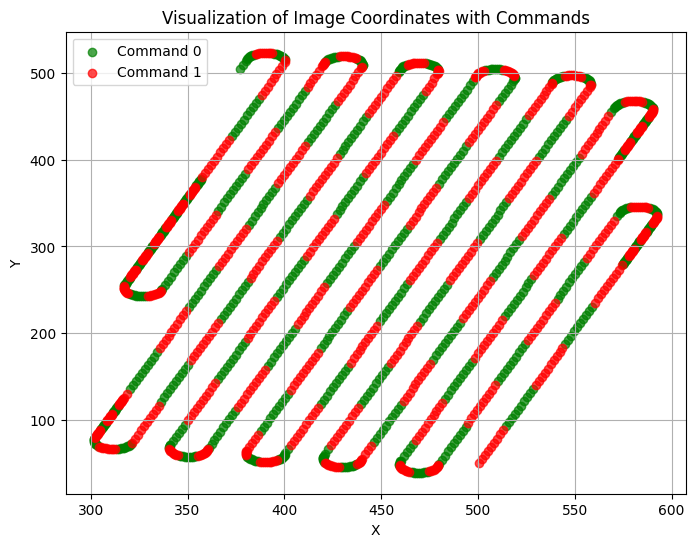

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading CSV file
data = pd.read_csv("bestpath.csv")

# Extract x and y coordinates and command information
x = data["x"]
y = data["y"]
command = data["command"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x[command == 0], y[command == 0], c='green', label='Command 0', alpha=0.7)  # For points where the command is 0, use green
plt.scatter(x[command == 1], y[command == 1], c='red', label='Command 1', alpha=0.7)  # For points where the command is 1, use red
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Image Coordinates with Commands')
plt.legend()  
plt.grid(True)
plt.show()



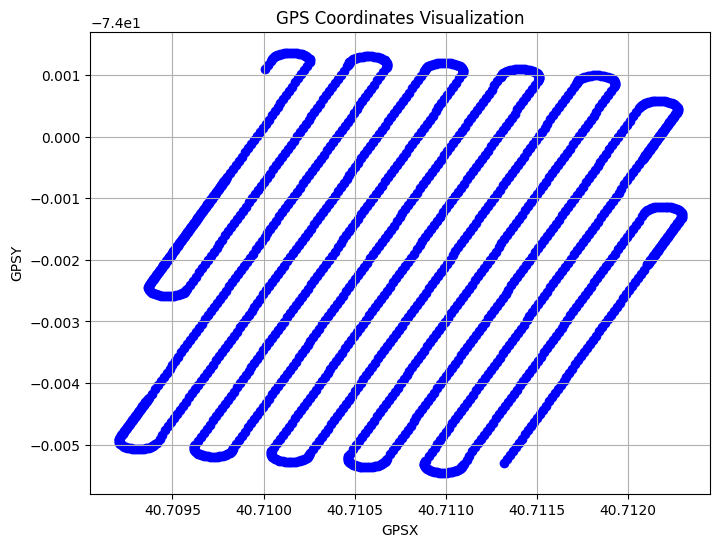

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read GPS coordinate data
df = pd.read_csv("bestpath_GPS.csv")

# Extract GPSX and GPSY columns
gps_x = df['GPSX']
gps_y = df['GPSY']

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(gps_x, gps_y, color='blue', marker='o')
plt.title('GPS Coordinates Visualization')
plt.xlabel('GPSX')
plt.ylabel('GPSY')
plt.grid(True)
plt.show()
